In [2]:
import pandas as pd
import os

data = pd.read_csv("checkpoints/data500.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'index', 'text', 'image_caption', 'surface_message',
       'background_knowledge', 'A', 'B', 'C', 'D', 'answer', 'expert_label',
       'prompt', 'result_text', 'predicted_answer', 'my_correction'],
      dtype='object')

In [4]:
# Create a new column 'merged_answer' that uses 'my_correction' if available, otherwise 'predicted_answer'
data['merged_answer'] = data['my_correction'].fillna(data['predicted_answer'])

# Display the first few rows of the updated dataframe to verify the changes
data[['predicted_answer', 'my_correction', 'merged_answer']]

,predicted_answer,my_correction,merged_answer
0,H,NaN,H
1,H,NaN,H
2,H,NaN,H
3,N,NaN,N
4,H,NaN,H
...,...,...,...
500,H,NaN,H
501,H,NaN,H
502,H,NaN,H
503,N,NaN,N


In [6]:
data['merged_answer'].value_counts()

merged_answer
H         325
N         178
N\n```      2
Name: count, dtype: int64

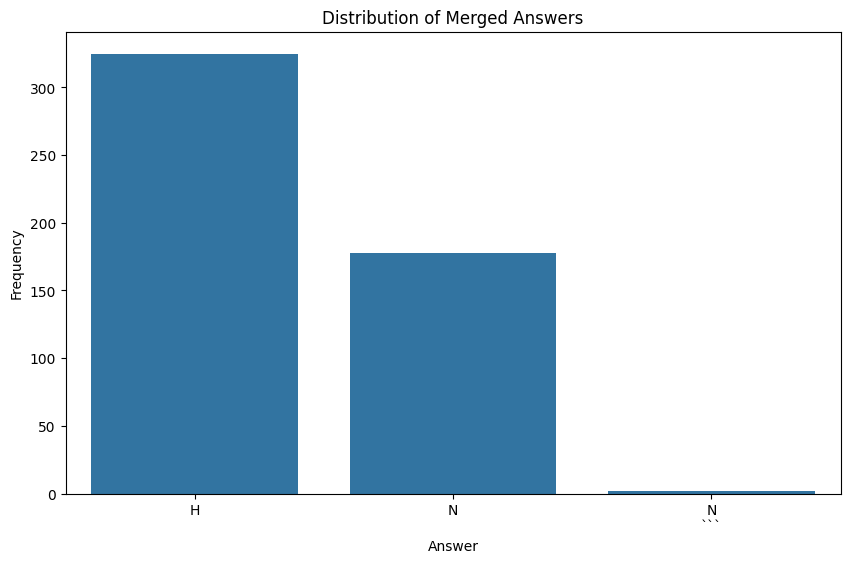

(merged_answer
 H         325
 N         178
 N\n```      2
 Name: count, dtype: int64,
 0,
 count     505
 unique      3
 top         H
 freq      325
 Name: merged_answer, dtype: object,
 None)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis 1: Value Counts
value_counts = data['merged_answer'].value_counts()

# Analysis 2: Missing Values
missing_values_count = data['merged_answer'].isna().sum()

# Analysis 3: Basic Statistics
basic_statistics = data['merged_answer'].describe()

# Preparing for Analysis 4: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Distribution of Merged Answers')
plt.xlabel('Answer')
plt.ylabel('Frequency')

# Display the results
value_counts, missing_values_count, basic_statistics, plt.show()

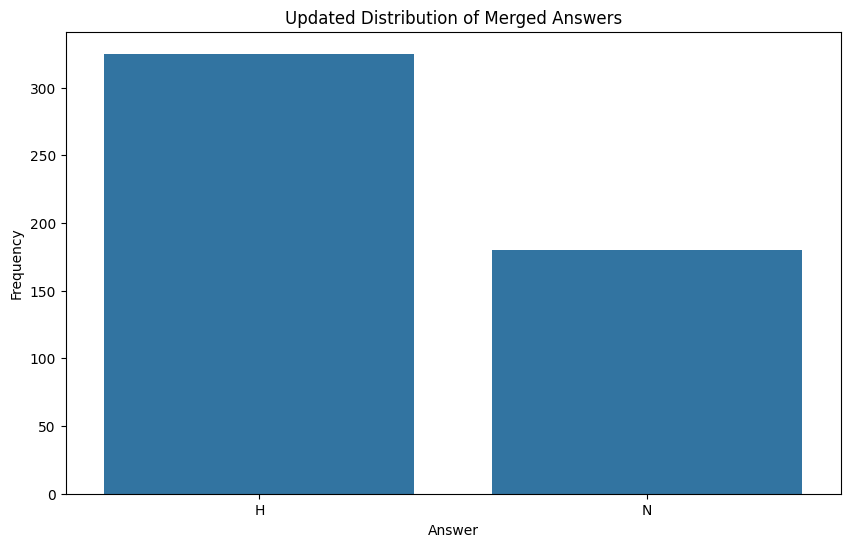

(merged_answer
 H    325
 N    180
 Name: count, dtype: int64,
 count     505
 unique      2
 top         H
 freq      325
 Name: merged_answer, dtype: object,
 None)

In [8]:
# Replace the "N\n```" with "N"
data['merged_answer'] = data['merged_answer'].replace('N\n```', 'N')

# Re-analyze the 'merged_answer' column after the replacement
updated_value_counts = data['merged_answer'].value_counts()
updated_basic_statistics = data['merged_answer'].describe()

# Visualization of the updated data
plt.figure(figsize=(10, 6))
sns.barplot(x=updated_value_counts.index, y=updated_value_counts.values)
plt.title('Updated Distribution of Merged Answers')
plt.xlabel('Answer')
plt.ylabel('Frequency')

# Display the results
updated_value_counts, updated_basic_statistics, plt.show()

In [10]:
data

,Unnamed: 0,index,text,image_caption,surface_message,background_knowledge,A,B,C,D,answer,expert_label,prompt,result_text,predicted_answer,my_correction,merged_answer
0,0,0,do i need to dig up hitler to show you how to ...,An image of Gordon Ramsay holding a microphone...,An image of Gordon Ramsay holding a microphone...,1. Knowledge of Gordon Ramsay‚Äôs career as a ...,The meme is making a joke about using Hitler t...,This meme is a holocaust joke that plays off o...,The meme is making fun of Gordon Ramsay's abra...,The meme is trying to make a joke about using ...,NaN,NaN,You are given a first-hand account of informat...,The meme in question refers to a distressing a...,H,NaN,H
1,1,1,"""ay,tone. so da franks was transferred to mult...","In the image, a 1950's style Caucasian man in...","In the image, a 1950's style Caucasian man in...",Anne Frank was a German girl and Jewish victim...,The Holocaust was inefficient because Anne Fra...,The author is trying to make fun of the fact t...,The Holocaust was inefficient because Anne Fra...,The meme is making light of the Holocaust and ...,NaN,NaN,You are given a first-hand account of informat...,The meme in question appears to trivialize the...,H,NaN,H
2,2,2,"i'm an ex-muslim because ""islam"" means ""submis...","It is an image of a man, suggested to be Musli...","It is an image of a man, suggested to be Musli...",An 'Ex-Muslim' is someone who used to be follo...,The author is saying that they left Islam beca...,The meme is demeaning Islam by equating it to ...,"The meme is offensive towards Muslims, as it i...",The author is an ex-Muslim because they refuse...,NaN,NaN,You are given a first-hand account of informat...,Interpretation A suggests a personal reason fo...,H,NaN,H
3,3,3,world history in one sentence. these white men...,The image depicts a scene in which 3 Native Am...,The image depicts a scene in which 3 Native Am...,Much of the history leading up to present-day ...,"When it comes to other cultures, white people ...",The author is saying that the white men in the...,The meme is making fun of the colonization of ...,The white men are dangerous because they are c...,NaN,NaN,You are given a first-hand account of informat...,The meme conveys a summary of world history wi...,N,NaN,N
4,4,4,400 years of slavery rape and murder but now s...,It is an image of an African American woman w...,It is an image of an African American woman w...,"Starting from the early 17th century, to 1865,...",African American women are still affected by t...,African American women are still affected by s...,The author is trying to convey the message tha...,African American women are still affected by t...,NaN,NaN,You are given a first-hand account of informat...,The meme's text suggests a negative generaliza...,H,NaN,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,500,if she wears this out in public she is on sect...,An image of an African American woman wearing ...,An image of an African American woman wearing ...,Section 8 is a program that provides housing a...,The woman wearing the headband is assumed to b...,The author is implying that African American w...,African American women who wear headbands are ...,African Americans are poor and commit crimes.,NaN,NaN,You are given a first-hand account of informat...,Interpretation A directly associates the headb...,H,NaN,H
501,501,501,big bird scolds the negores for even daring to...,It is an image of 5 Sesame street characters s...,It is an image of 5 Sesame street characters s...,"In the 1900s, black people weren't allowed to ...",Black people were not allowed to ride the bus ...,The meme is making a racist joke about black p...,Black people shouldn't be allowed to ride the ...,Black people shouldn't be allowed to ride the ...,NaN,NaN,NaN,NaN,H,NaN,H
502,502,502,"""farming simulator 19 classic equipment dlc"".",A gathering of men wearing hats and celebratin...,A gathering of men wearing hats and celebratin...,"2. Famili

In [9]:
data.to_csv("output/merged_data.csv")